In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
class logistic:
    
    def sigmoid(self, h):
        return 1/(1 + np.exp(-h))
    
    def cross_entropy(self,y,p_hat):
        return -np.sum(y * np.log(p_hat) + (1 - y) * np.log(1 - p_hat))
    
    def accuracy(self, y, p_hat):
        acc=np.mean(y == np.round(p_hat))
        return acc
    
    def fit(self,X,y,lambda1=0,lambda2=0, eta = 1e-4, epochs = int(1e4),show_curve = False): #Fits model
       
        N,D=X.shape
        if len(y.shape) > 1:
            K=y.shape[1]
        else:
            K = 1
            
        self.w = np.random.randn(D,K)
    
        J = [0]*epochs
        
        
        for epoch in range(epochs):
            p_hat = self.sigmoid(X.dot(self.w))
            J[epoch] = self.cross_entropy(y,p_hat) + lambda1*np.sum(np.abs(self.w))
            self.w -= eta * X.T.dot(p_hat - y) + lambda1*np.sign(self.w)+lambda2*self.w
            
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("J")
    
    def predict(self, X):                #Predicts with new data
        p_hat = self.sigmoid(X.dot(self.w))
        return p_hat
    
    
    def print_acc(self,X):             #Gets accuracy
        assert not hasattr(self,'w'), "need to fit model first" 
        p_hat = self.sigmoid(X.dot(self.w))
        print("Accuracy: {:0.4f}".format(self.accuracy(y,p_hat)))

In [3]:
data = pd.read_csv("/home/techfield/class/Homework8_logistic/xor.csv") 
data[:10]

,x1,x2,y
0,1.907567,0.325865,0
1,2.270544,2.258817,0
2,2.323086,1.466601,0
3,0.752419,2.684305,0
4,2.837229,2.238149,0
5,1.758979,3.873314,0
6,-0.153115,2.294020,0
7,3.385935,1.058756,0
8,1.981424,3.041335,0
9,1.242928,-0.075891,0


In [4]:
y = data.iloc[:,2]

In [5]:
y = data.y.values.reshape([data.shape[0],1])
y.shape[0]

4000

In [6]:
X_1 = data['x1']
X_2 = data['x2']
X_3 = X_1 * X_2

In [7]:
data1 = np.column_stack((np.ones((4000,1)), X_1,X_2,X_3))

In [8]:
X = data1

In [9]:
l = logistic()

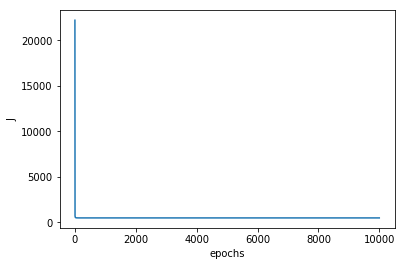

In [11]:
l.fit(X,y,show_curve=True)

In [12]:
l.print_acc(X)

Accuracy: 0.9565
